# Шифр Плейфера
Импорты, алфавит и ключ

In [2]:
from colorama import Fore as text_color
from utils.data_io import get_test_case
from utils.validation import validate_string_key

alphabet='абвгдежзиклмнопрстуфхцчшщыьэюя'
key = validate_string_key(input('Введите ключ: '), alphabet=alphabet, is_can_repeat=False)

Функция шифрования

In [3]:
def playfair(string: str, alphabet: str = alphabet, key: str = 'АБВГД') -> str:
    processed_text = string[0]
    for i in range(1, len(string)):
        if string[i] == string[i-1]:
            processed_text += 'Ф'
        processed_text += string[i]
    
    # Если текст имеет нечётную длину, добавляем Ф в конец
    if len(processed_text) % 2 != 0:
        processed_text += 'Ф'
    
    string = processed_text
    alphabet = alphabet.upper()
    
    for char in alphabet:
        if not char in key:
            key += char
    
    matrix_key = []
    for i in range(0, len(key), 6):
        matrix_key.append(list(key[i:i + 6]))
    
    def get_position(char):
        for i in range(len(matrix_key)):
            for j in range(len(matrix_key[i])):
                if matrix_key[i][j] == char:
                    return i, j
                    
    new_str = ''
    # Обрабатываем текст попарно
    for i in range(0, len(processed_text)-1, 2):
        char1, char2 = processed_text[i], processed_text[i+1]
        pos1 = get_position(char1)
        pos2 = get_position(char2)
        
        # Если буквы в одной строке
        if pos1[0] == pos2[0]:
            new_str += matrix_key[pos1[0]][(pos1[1] + 1) % 6] + \
                         matrix_key[pos2[0]][(pos2[1] + 1) % 6]
            
        # Если буквы в одном столбце
        elif pos1[1] == pos2[1]:
            new_str += matrix_key[(pos1[0] + 1) % 5][pos1[1]] + \
                         matrix_key[(pos2[0] + 1) % 5][pos2[1]]
            
        # Если буквы находятся в разных строках и столбцах
        else:
            new_str += matrix_key[pos1[0]][pos2[1]] + \
                         matrix_key[pos2[0]][pos1[1]]
    
    return new_str

Функция расшифрования

In [4]:
def playfair_decrypt(string: str, alphabet: str = alphabet, key: str = 'АБВГД') -> str:
    processed_text = string[0]
    for i in range(1, len(string)):
        if string[i] == string[i-1]:
            processed_text += 'Ф'
        processed_text += string[i]
    
    # Если текст имеет нечётную длину, добавляем Ф в конец
    if len(processed_text) % 2 != 0:
        processed_text += 'Ф'
    
    string = processed_text
    alphabet = alphabet.upper()
    
    for char in alphabet:
        if not char in key:
            key += char
    
    matrix_key = []
    for i in range(0, len(key), 6):
        matrix_key.append(list(key[i:i + 6]))
    
    def get_position(char):
        for i in range(len(matrix_key)):
            for j in range(len(matrix_key[i])):
                if matrix_key[i][j] == char:
                    return i, j
                    
    new_str = ''
    # Обрабатываем текст попарно
    for i in range(0, len(processed_text)-1, 2):
        char1, char2 = processed_text[i], processed_text[i+1]
        pos1 = get_position(char1)
        pos2 = get_position(char2)
        
        # Если буквы в одной строке
        if pos1[0] == pos2[0]:
            new_str += matrix_key[pos1[0]][(pos1[1] - 1) % 6] + \
                         matrix_key[pos2[0]][(pos2[1] - 1) % 6]
            
        # Если буквы в одном столбце
        elif pos1[1] == pos2[1]:
            new_str += matrix_key[(pos1[0] - 1) % 5][pos1[1]] + \
                         matrix_key[(pos2[0] - 1) % 5][pos2[1]]
            
        # Если буквы находятся в разных строках и столбцах
        else:
            new_str += matrix_key[pos1[0]][pos2[1]] + \
                         matrix_key[pos2[0]][pos1[1]]
    
    processed_str = ''
    
    for i in range(1, len(string)):
        if string[i] == string[i-1]:
            processed_text += 'Ф'
        processed_text += string[i]
    
    return new_str

Проверка

In [6]:
try:
    open_text = 'НЕВСЕТЕПОВАРАЗПТЧТОСДЛИННЫМИНОЖАМИХОДЯТТЧК'
    encrypted_text = playfair(open_text, key=key)
    decrypted_text = playfair_decrypt(encrypted_text, key=key)

    assert encrypted_text == 'АНЗКБМНЕКДЖЦЛЖБКШСРТЗНДБХЕЕФДБРДЕРДШХОБШШМУС', 'Зашифрованный текст не совпадает с образцом'
    assert decrypted_text == 'НЕВСЕТЕПОВАРАЗПТЧТОСДЛИНФНМЫХГАТГНОЖЧФТНЧУФТЧК', 'Расшифрованный текст не совпадает с изначальным'
    print(f'{text_color.LIGHTGREEN_EX}Шифрование корректно{text_color.RESET}')
except AssertionError as e:
    print(f'{text_color.LIGHTRED_EX}Шифрование не корректно: {e}{text_color.RESET}')

Шифрование корректно


Сравнение гистограмм до шифрования и после

Открытый текст


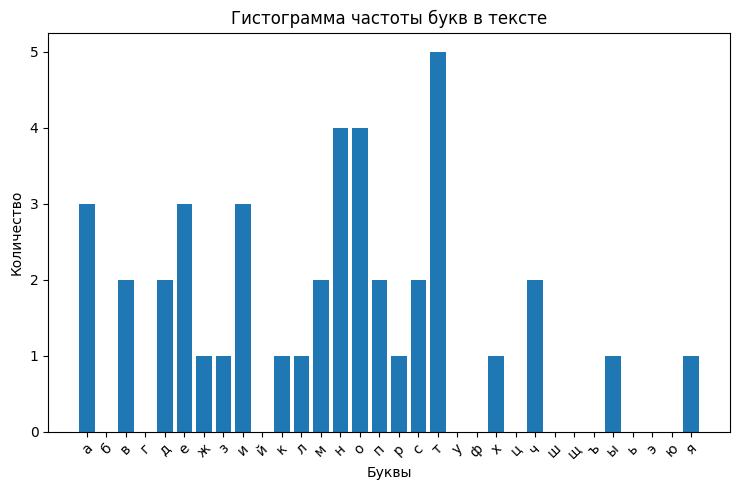

Зашифрованный текст


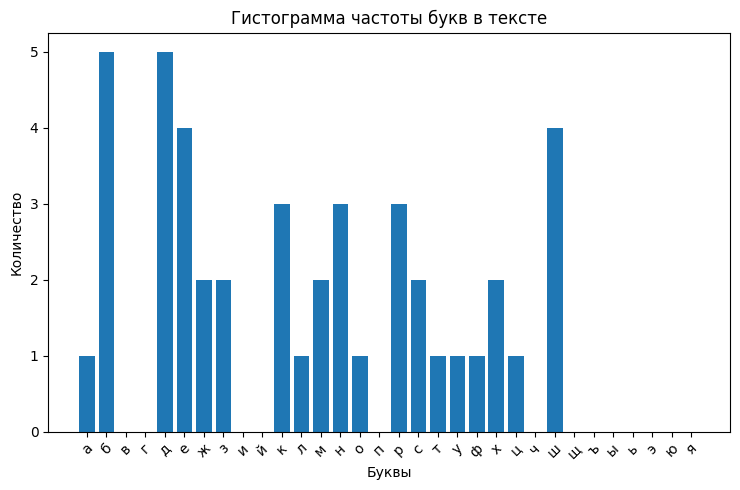

In [7]:
from utils.gist import plot_letter_count

print('Открытый текст')
plot_letter_count(open_text)
print('Зашифрованный текст')
plot_letter_count(encrypted_text)

Ввод строки для шифрования

In [5]:
open_text = input('Введите открытый текст для шифрования: ')
encrypted_text = playfair(open_text, key=key)
print(encrypted_text)

ЖТЕЦАЗДШ


Ввод строки для расшифрования

In [6]:
encrypted_text = input('Введите текст для расшифрования: ')
decrypted_text = playfair_decrypt(encrypted_text, key=key)
print(decrypted_text)

КОНФНИКФ
